## Decompress dataset file


https://www.kaggle.com/datasets/peace1019/fingerprint-dataset-for-fvc2000-db4-b/data


In [1]:
from zipfile import ZipFile
with ZipFile( '/content/dataset.zip' ,'r') as zipObj:
  zipObj.extractall('/content/')

## imports

In [2]:
import matplotlib.pyplot as plt
import joblib
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

## Load photos

In [3]:
def load_images_from_folder(folder):

  images = []
  labels = []

  # Iterate over all of the files in the folder
  for filename in os.listdir(folder):

    img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)

    if img is not None:

      # Add the image and label to the corresponding lists
      images.append(img)
      labels.append(int(filename.split('_')[0].split('.')[0]))

  return images, labels

x_train, y_train = load_images_from_folder('/content/dataset/train/')
x_test, y_test = load_images_from_folder('/content/dataset/test')

print("training images:", len(x_train))
print("testing images:", len(x_test))

Number of training images: 800
Shape of the first training image: (160, 160)
Number of testing images: 10


## Assign train and test

In [4]:
# Resize all of the images in the training dataset to be 160x160
x_train = [cv2.resize(img, (160, 160)) for img in x_train]
# Convert the list of training images to a NumPy array
x_train = np.array(x_train).reshape(-1, 160, 160, 1).astype('float32') / 255.0

# Convert the list of test images to a NumPy array
x_test = np.array(x_test).reshape(-1, 160, 160, 1).astype('float32') / 255.0

# Convert the list of training labels to one-hot format
y_train = to_categorical(y_train)

# Convert the list of test labels to one-hot format
y_test = to_categorical(y_test)


## Train

In [5]:
# Create a sequential model
model = models.Sequential()

# Add a convolutional layer with 32 filters of size 3x3
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(160, 160, 1)))

# Add a max pooling layer with a pooling size of 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional layer with 64 filters of size 3x3
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

# Add another max pooling layer with a pooling size of 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the previous layer
model.add(layers.Flatten())

# Add a dense layer with 128 neurons
model.add(layers.Dense(128, activation="relu"))

# Add a dense layer with 10 neurons, one for each fingerprint class
model.add(layers.Dense(10, activation="softmax"))

# Compile the model using the Adam optimizer and the categorical cross-entropy loss function
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model for 10 epochs on the training dataset
model.fit(x_train, y_train, epochs=10)

# Evaluate the model on the test dataset and print the test loss and test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])



Epoch 1/10
25/25 [==============================] - 34s 1s/step - loss: 4.4120 - accuracy: 0.1112
Epoch 2/10
25/25 [==============================] - 32s 1s/step - loss: 2.2907 - accuracy: 0.1437
Epoch 3/10
25/25 [==============================] - 32s 1s/step - loss: 2.1614 - accuracy: 0.2237
Epoch 4/10
25/25 [==============================] - 32s 1s/step - loss: 1.7754 - accuracy: 0.4437
Epoch 5/10
25/25 [==============================] - 33s 1s/step - loss: 1.3390 - accuracy: 0.5950
Epoch 6/10
25/25 [==============================] - 31s 1s/step - loss: 0.9049 - accuracy: 0.7400
Epoch 7/10
25/25 [==============================] - 33s 1s/step - loss: 0.6573 - accuracy: 0.7900
Epoch 8/10
25/25 [==============================] - 33s 1s/step - loss: 0.5441 - accuracy: 0.8375
Epoch 9/10
25/25 [==============================] - 33s 1s/step - loss: 0.3888 - accuracy: 0.9137
Epoch 10/10
25/25 [==============================] - 31s 1s/step - loss: 0.2449 - accuracy: 0.9538
Test loss: 0.517255

In [6]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
25/25 [==============================] - 32s 1s/step - loss: 0.1600 - accuracy: 0.9712 - val_loss: 0.2485 - val_accuracy: 1.0000
Epoch 2/25
25/25 [==============================] - 33s 1s/step - loss: 0.0897 - accuracy: 0.9875 - val_loss: 0.1416 - val_accuracy: 1.0000
Epoch 3/25
25/25 [==============================] - 32s 1s/step - loss: 0.0626 - accuracy: 0.9962 - val_loss: 0.0822 - val_accuracy: 1.0000
Epoch 4/25
25/25 [==============================] - 32s 1s/step - loss: 0.3355 - accuracy: 0.9312 - val_loss: 0.7197 - val_accuracy: 0.9000
Epoch 5/25
25/25 [==============================] - 35s 1s/step - loss: 0.2350 - accuracy: 0.9712 - val_loss: 0.1637 - val_accuracy: 1.0000
Epoch 6/25
25/25 [==============================] - 31s 1s/step - loss: 0.0589 - accuracy: 0.9987 - val_loss: 0.1260 - val_accuracy: 1.0000
Epoch 7/25
25/25 [==============================] - 31s 1s/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 0.0811 - val_accuracy: 1.0000
Epoch 8/25
25/25 [==

## Model's accuracy and loss

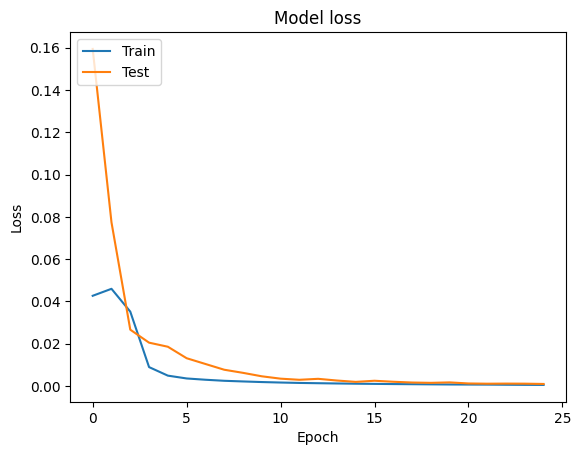

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


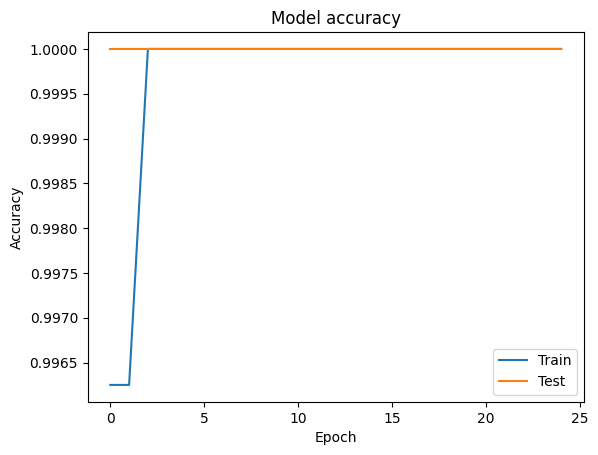

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()


## Authentication and registration

In [10]:
def register_fingerprint(image, user_id):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (160, 160))
    image = image.reshape(-1, 160, 160, 1).astype('float32') / 255.0

    features = model.predict(image)

    features = features.flatten()
    with open(f'dataset/features/fingerprint_features{user_id}.pickle', 'wb') as f:
        joblib.dump(features, f)

def authenticate_fingerprint(image, user_id,threshold=0.25):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (160, 160))
    image = image.reshape(-1, 160, 160, 1).astype('float32') / 255.0

    features = model.predict(image)


    with open(f'dataset/features/fingerprint_features{user_id}.pickle', 'rb') as f:
        known_features = joblib.load(f)

    dist = np.linalg.norm(features - known_features, axis=1)
    print(dist)

    if dist < threshold:
        return True
    else:
        return False


### Registration

In [11]:
# # Load the fingerprint image
# image = cv2.imread('dataset/auth/9.bmp')
# input_image=cv2.imread('dataset/auth/9.bmp')
# # Register the fingerprint features
# # register_fingerprint(image,9)

# # Authenticate the fingerprint
# is_authenticated = authenticate_fingerprint(input_image,0)

# # Print the authentication result
# print(is_authenticated)


In [12]:
i=0
for fn in sorted(os.listdir('/content/dataset/users/')):
  img = cv2.imread(os.path.join('/content/dataset/users/',fn))
  if img is not None:
    register_fingerprint(img,i)
    i=i+1

1/1 [==============================] - 0s 32ms/step


## Evaluation

`Thresholds FNMR FMR`

In [8]:
thresholds = np.arange(0, 2.025, 0.05)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ])

In [15]:
FNMR=[]
for t in thresholds:
  i=0
  matches=[]
  for fn in sorted(os.listdir('/content/dataset/test/')):
    img = cv2.imread(os.path.join('/content/dataset/test/',fn))
    if img is not None:
      auth_result=authenticate_fingerprint(img,i,t)
      print(fn , i, auth_result)
      matches.append(auth_result)
      i=i+1
  FNMR_t= matches.count(False)/(matches.count(True)+matches.count(False))
  FNMR.append(FNMR_t)
FNMR

1/1 [==============================] - 0s 34ms/step
[0.62143797]
0.bmp 0 False
1/1 [==============================] - 0s 32ms/step
[0.00165034]
1.bmp 1 False
1/1 [==============================] - 0s 32ms/step
[0.12460355]
2.bmp 2 False
1/1 [==============================] - 0s 33ms/step
[0.07723053]
3.bmp 3 False
1/1 [==============================] - 0s 34ms/step
[0.33620796]
4.bmp 4 False
1/1 [==============================] - 0s 34ms/step
[1.1183748]
5.bmp 5 False
1/1 [==============================] - 0s 33ms/step
[0.00036183]
6.bmp 6 False
1/1 [==============================] - 0s 32ms/step
[0.7197538]
7.bmp 7 False
1/1 [==============================] - 0s 34ms/step
[0.00195689]
8.bmp 8 False
1/1 [==============================] - 0s 34ms/step
[0.30805358]
9.bmp 9 False
1/1 [==============================] - 0s 33ms/step
[0.62143797]
0.bmp 0 False
1/1 [==============================] - 0s 32ms/step
[0.00165034]
1.bmp 1 True
1/1 [==============================] - 0s 36ms/step
[0.

[1.0,
 0.7,
 0.6,
 0.5,
 0.5,
 0.5,
 0.5,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.2,
 0.2,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [13]:
FMR = []
for t in thresholds:
    non_matches_all = []
    for j in range(10):
        non_matches = []
        for i, fn in enumerate(sorted(os.listdir('/content/dataset/test/'))):
            if i != j:
                img = cv2.imread(os.path.join('/content/dataset/test/', fn))
                if img is not None:
                    auth_result = authenticate_fingerprint(img, j, t)
                    print( j , i)
                    print(fn , j, auth_result)
                    non_matches.append(auth_result)
        non_matches_all.append(non_matches.count(True) / 9)
    FMR.append(np.mean(non_matches_all))
FMR

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 59ms/step
[1.4127123]
1 2
2.bmp 1 False
1/1 [==============================] - 0s 52ms/step
[1.4102578]
1 3
3.bmp 1 False
1/1 [==============================] - 0s 54ms/step
[1.4084034]
1 4
4.bmp 1 False
1/1 [==============================] - 0s 46ms/step
[1.41286]
1 5
5.bmp 1 False
1/1 [==============================] - 0s 48ms/step
[1.4125979]
1 6
6.bmp 1 False
1/1 [==============================] - 0s 48ms/step
[1.4034666]
1 7
7.bmp 1 False
1/1 [==============================] - 0s 53ms/step
[1.4096614]
1 8
8.bmp 1 False
1/1 [==============================] - 0s 53ms/step
[1.4128991]
1 9
9.bmp 1 False
1/1 [==============================] - 0s 50ms/step
[1.3144187]
2 0
0.bmp 2 True
1/1 [==============================] - 0s 49ms/step
[1.3278558]
2 1
1.bmp 2 True
1/1 [==============================] - 0s 58ms/step
[1.3030573]
2 3
3.bmp 2 True
1/1 [==============================] - 0s 48ms/step


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02222222222222222,
 0.03333333333333333,
 0.03333333333333333,
 0.04444444444444444,
 0.04444444444444444,
 0.04444444444444444,
 0.06666666666666667,
 0.11111111111111112,
 0.24444444444444446,
 0.32222222222222224,
 0.4,
 0.5,
 0.611111111111111,
 0.7,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

##  Receiver Operating Characteristic

In [16]:
FMR= np.array(FMR)
FNMR=np.array(FNMR)


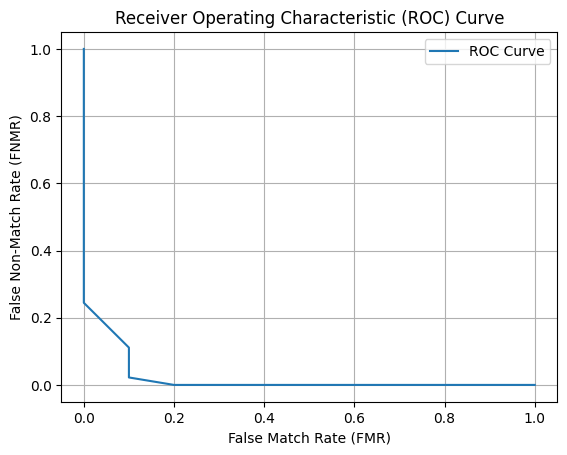

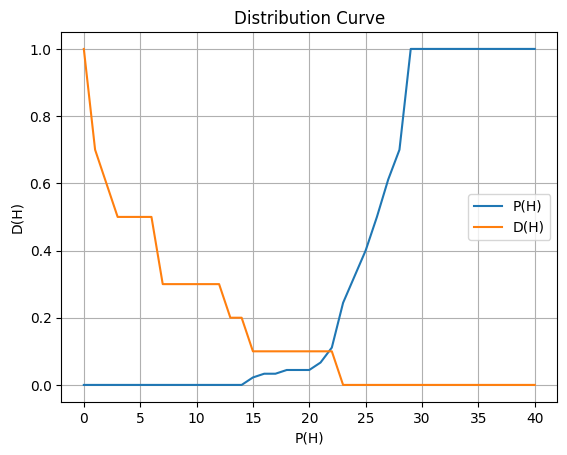

Equal Error Rate (EER): 0.10555555555555557
Threshold at EER: 1.1


In [17]:

# Plot ROC curve
plt.plot(FNMR, FMR, label='ROC Curve')
plt.xlabel('False Match Rate (FMR)')
plt.ylabel('False Non-Match Rate (FNMR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


print()
# Plot Distribution curve
plt.plot(FMR,  label='P(H)')
plt.plot(FNMR,  label='D(H)')

plt.xlabel('P(H)')
plt.ylabel('D(H)')
plt.title('Distribution Curve')
plt.legend()
plt.grid(True)
plt.show()

# Determine Equal Error Rate (EER)
eer_index = np.argmin(np.abs(FMR - FNMR))
eer_threshold = thresholds[eer_index]
eer_value = (FMR[eer_index] + FNMR[eer_index]) / 2
print("Equal Error Rate (EER):", eer_value)
print("Threshold at EER:", eer_threshold)

In [23]:
print("FNMR at EER",FNMR[eer_index])
print("FMR at EER ",FMR[eer_index])

FNMR at EER 0.1
FMR at EER  0.11111111111111112
